### This script is used to find the best hyperparameter combination using Grid Search 
### by training the model (with oversampling) over all feature
The test result of the model with the the best hyperparameter combination will then be used to compare with the model that is trained on selected features chosen by GA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
from utilities import import_data
from utilities import set_seed
from casper_test import final_test
from casper_test import rkf_validator
from sklearn.model_selection import train_test_split

In [2]:
# select training device
device = "cpu"
    
# make results determinstic
seed = 4660
if seed != None:
    set_seed(seed)
    
# Define hyperparameter candidates
# hyperparameters = {'max_hidden_neurons': 5,
#                    'P': 1,
#                    'D': 0.005,
#                    'lrs': [0.2, 0.005, 0.001]}

hyperparameters_candidates = {'max_hidden_neurons': [1, 5, 10, 15],
                   'P': [0.1, 1, 5, 10],
                   'D': [0, 0.005, 0.05],
                   'lrs': [[0.5, 0.01, 0.005], [0.2, 0.005, 0.001], [0.05, 0.01, 0.0005]]}

# hyperparameters_candidates = {'max_hidden_neurons': [1, 5],
#                    'P': [1, 2],
#                    'D': [0.005],
#                    'lrs': [[0.05, 0.01, 0.0005]]}

# import data
data, _, _ = import_data()
train_data, test_data, _, _ = train_test_split(data, data.iloc[:,0], test_size=0.2, random_state=seed)

n_splits = 10
n_repeats = 4

In [3]:
scores = []
hyperparameter_combinations = []

In [4]:
def grid_search(data, hyperparameters_candidates, n_splits, n_repeats, device='cpu'):
    print(f"Sample Size: {data.shape[0]}")
    start_time = time.time()
    num_of_combinations = (len(hyperparameters_candidates['max_hidden_neurons']) * 
                           len(hyperparameters_candidates['P']) * 
                           len(hyperparameters_candidates['D']) * 
                           len(hyperparameters_candidates['lrs'])) 
    count = 1
    for max_hidden_neurons in hyperparameters_candidates['max_hidden_neurons']:
        for P in hyperparameters_candidates['P']:
            for D in hyperparameters_candidates['D']:
                for lrs in hyperparameters_candidates['lrs']:
                    hyperparameters = {'max_hidden_neurons': max_hidden_neurons,
                                       'P': P,
                                       'D': D,
                                       'lrs': lrs}
                    score = rkf_validator(data, hyperparameters, n_splits, n_repeats, device=device, fast_mode=True, verbose=False, oversampling=True)
                    print(f"Searched Hyperparameter Combination: {count}/{num_of_combinations}   MSE: {score}", end = '\r')
                    scores.append(score)
                    hyperparameter_combinations.append(hyperparameters)
                    count += 1
    print(f"Grid Search Finished, Spent: {time.time() - start_time}s")

In [ ]:
# Grid Search
grid_search(train_data, hyperparameters_candidates, n_splits, n_repeats, device='cpu')

Sample Size: 208


In [5]:
# Save all hyperparameter combinations
# with open('results/grid_search_no_GA_oversampling.pkl', 'wb') as fp:
#     pickle.dump(hyperparameter_combinations, fp)
with open('results/grid_search_no_GA_oversampling.pkl', 'rb') as fp:
    hyperparameter_combinations = pickle.load(fp)
    
# Save all scores corresponding to different hyperparameter combinations
# with open('results/grid_search_no_GA_oversampling.npy', 'wb') as f:
#     np.save(f, scores)
with open('results/grid_search_no_GA_oversampling.npy', 'rb') as f:
    scores = np.load(f)

best_hyperparameters = hyperparameter_combinations[np.argmin(scores)]
print(f"best score: {np.min(scores)}")
print(f"best hyperparameters: {best_hyperparameters}")

best score: 3.2223126113414766
best hyperparameters: {'max_hidden_neurons': 1, 'P': 5, 'D': 0.05, 'lrs': [0.5, 0.01, 0.005]}


Model is trained 200 times
with each run has different test-training split and initialised weights
Mean: 3.063424753248691395    MAE: 1.4237
Median: 2.996081233024597
Standard Deviation: 0.7761708720718618

Mean: 1.4229717522859573
Median: 1.433808147907257
Standard Deviation: 0.20020303117956798


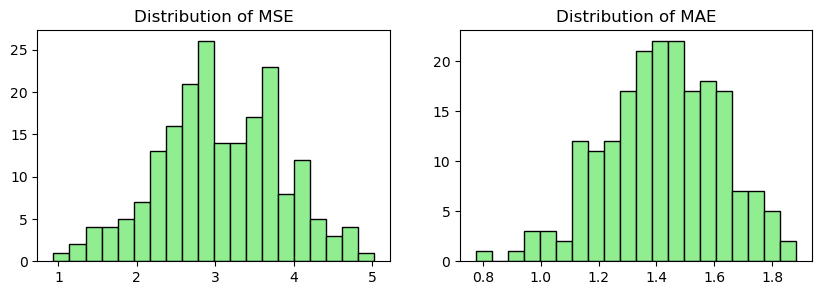

Class 1
Number of runs that contain MSE/MAE for this class: 40
MSE: average over all 40 runs: 15.0488
MSE: median over all 40 runs: 15.1457
MSE: std over all 40 runs: 4.8877
L1E: average of MAE over all 40 runs: 3.8204
L1E: median over all 40 runs: 3.8916
L1E std over all 40 runs: 0.6732

Class 2
Number of runs that contain MSE/MAE for this class: 154
MSE: average over all 154 runs: 6.4516
MSE: median over all 154 runs: 5.9164
MSE: std over all 154 runs: 4.5905
L1E: average of MAE over all 154 runs: 2.2358
L1E: median over all 154 runs: 2.2134
L1E std over all 154 runs: 0.9521

Class 3
Number of runs that contain MSE/MAE for this class: 191
MSE: average over all 191 runs: 3.6234
MSE: median over all 191 runs: 3.1015
MSE: std over all 191 runs: 2.3981
L1E: average of MAE over all 191 runs: 1.6105
L1E: median over all 191 runs: 1.5819
L1E std over all 191 runs: 0.6405

Class 4
Number of runs that contain MSE/MAE for this class: 199
MSE: average over all 199 runs: 1.3690
MSE: median over 

In [6]:
final_test(data, best_hyperparameters, 10, 20, device=device, oversampling=True)